In [1]:
#number_of_streamlines.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 28 Nov 2021.
#plot evolution of self-confining ringlet

In [2]:
#restore output
from helper_fns import *
execfile('inputs.py')
r, t, vr, vt, times, lambda0, monitor = restore_output(output_folder)
a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
print 'r.shape = ', r.shape
print 'total_ring_mass = ', total_ring_mass
print 'shear_viscosity = ', shear_viscosity
print 'bulk_viscosity = ', bulk_viscosity
print 'initial_orbits = ', initial_orbits
print 'fast_gravity = ', fast_gravity
print 'e.min() = ', e.min()
print 'e.max() = ', e.max()
print 'monitor = ', monitor

r.shape =  (1001, 9, 241)
total_ring_mass =  5e-10
shear_viscosity =  2.5e-12
bulk_viscosity =  2.5e-12
initial_orbits =  {'w_prime': 0.0, 'shape': 'eccentric', 'e': 0.01, 'e_prime': 0.0}
fast_gravity =  False
e.min() =  0.008496662895713339
e.max() =  0.011077903438225995
monitor =  {'current_time': 1638082179, 'streamline_crossing_timestep': None, 'start_time': 1638077146, 'modified_params': None, 'nan_timestep': None, 'current_timestep': 600000}


In [3]:
#time in units of viscous timescale
viscous_timescale = (radial_width**2)/(12*np.abs(shear_viscosity))
print 'viscous_timescale = ', viscous_timescale
times_viscous = times/viscous_timescale
print 'times_viscous.max() = ', times_viscous.max()

viscous_timescale =  2999.9999999999995
times_viscous.max() =  100.00000000000001


In [4]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
color_seq = plt.rcParams['axes.prop_cycle'].by_key()['color']
from matplotlib import rcParams
import numpy as np
import pandas as pd

In [5]:
#calculate differences da, de, dwt between outer & inner streamline's periapse
from libration import *
a_inner, a_outer, a_mean, da, e_inner, e_outer, e_mean, de, wt_inner, wt_outer, dwt = orbit_deltas(times, r, a, e, wt)

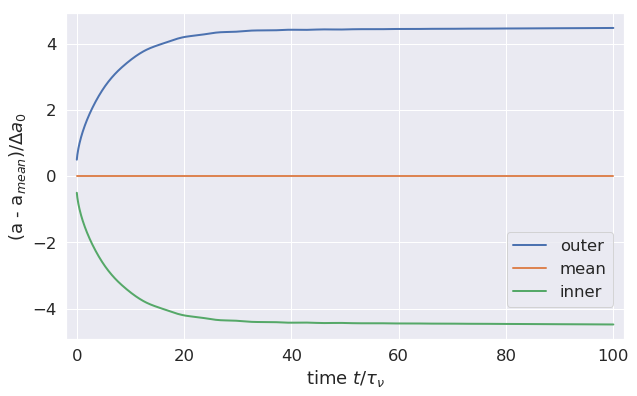

In [6]:
#plot streamline's mutual a-evolution
da_init = da[0]
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = (a_outer - a_mean)/da_init
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=1, label='outer')
y = (a_mean - a_mean)/da_init
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=1, label='mean')
y = (a_inner - a_mean)/da_init
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=1, label='inner')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel('(a - a$_{mean})/\Delta a_0$')
p = ax.set_xlim(-2, 102)
p = ax.legend(loc=(0.79, 0.1))

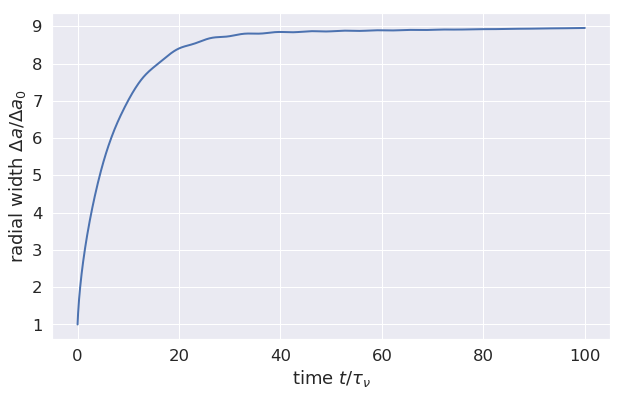

In [7]:
#plot delta_a versus time
x = times_viscous
y = da/da_init
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2)
p = ax.set_ylabel(r'radial width $\Delta a/\Delta a_0$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')

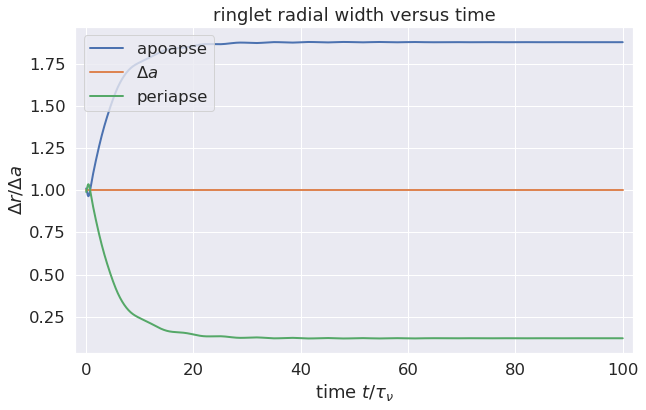

In [8]:
#plot streamline's dr_peri and dr_apo vs time
q_inner = a_inner*(1.0 - e_inner)
q_outer = a_outer*(1.0 - e_outer)
Q_inner = a_inner*(1.0 + e_inner)
Q_outer = a_outer*(1.0 + e_outer)
dr_peri = q_outer - q_inner
dr_apo = Q_outer - Q_inner
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = dr_apo/da
p = ax.plot(x, y, linestyle='-', linewidth=2, label='apoapse')
y = da/da
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$\Delta a$')
y = dr_peri/da
p = ax.plot(x, y, linestyle='-', linewidth=2, label='periapse')
p = ax.set_title('ringlet radial width versus time')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$\Delta r/\Delta a$')
p = ax.set_xlim(-2, 102)
p = ax.legend()

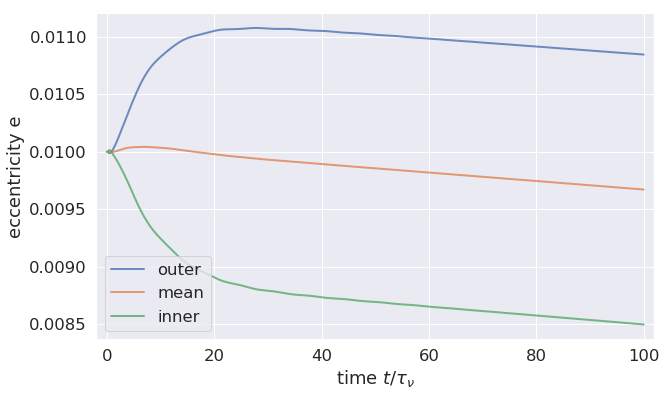

In [9]:
#plot streamline's e-evolution
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = e_outer
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='outer')
y = e_mean
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='mean')
y = e_inner
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.8, label='inner')
p = ax.set_ylabel('eccentricity e')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_xlim(-2, 102)
p = ax.legend()

1.0002228918687368 0.01003491882144153 1.0015375409530867 2.5e-12 10073189.951047445


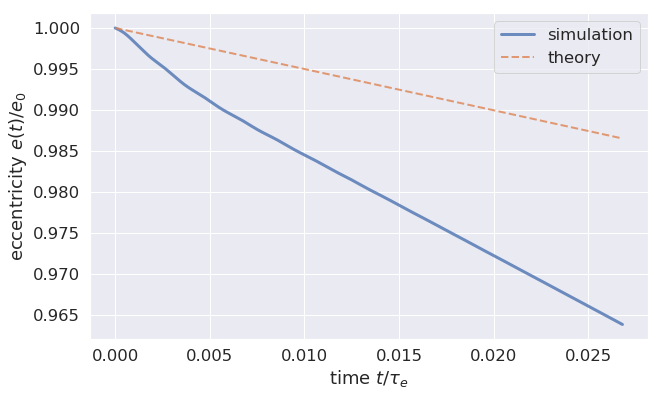

In [10]:
#plot streamline's e-damping
idx = 100
a_sub = a_mean[idx:]
e_sub = e_mean[idx:]
times_sub = times[idx:]
a0 = a_sub[0]
e0 = e_sub[0]
w0 = Omega(J2, Rp, a0)
I_ep = 0.889
tau_e = 2*a0*a0*e0*e0/(9*I_ep*shear_viscosity)
print a0, e0, w0, shear_viscosity, tau_e
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = (times_sub - times_sub[0])/tau_e
y = e_sub/e0
p = ax.plot(x, y, linestyle='-', linewidth=3, alpha=0.8, label='simulation')
y = np.sqrt(1 - x)
p = ax.plot(x, y, linestyle='dashed', linewidth=2, alpha=0.8, label='theory')
p = ax.set_ylabel(r'eccentricity $e(t)/e_0$')
p = ax.set_xlabel(r'time $t/\tau_e$')
p = ax.legend()

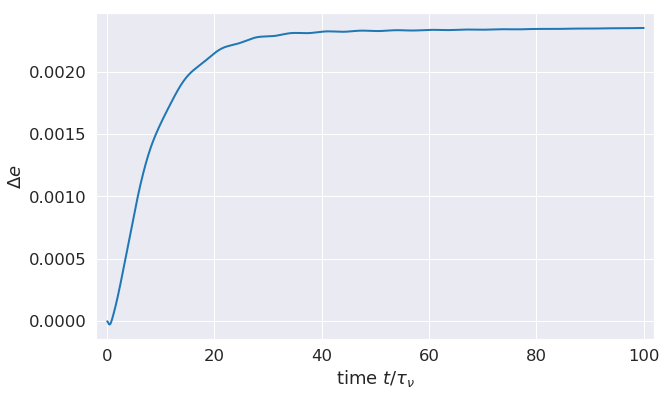

In [11]:
#plot de versus time
x = times_viscous
y = de
sns.set(font_scale=1.5, font='DejaVu Sans')
fig, ax = plt.subplots(figsize=(10, 6))
color = color_seq[0]
p = ax.plot(x, y, linestyle='-', linewidth=2, color=color)
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$\Delta e$')
p = ax.set_xlim(-2, 102)
#p = ax.set_ylim(-0.00005, 0.00125)

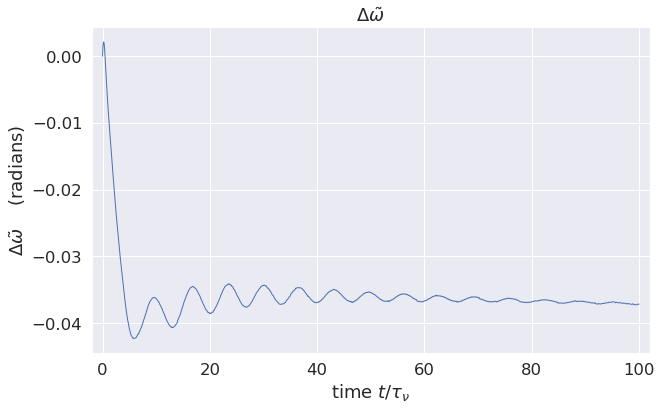

In [12]:
#plot dwt versus time
x = times_viscous
y = dwt
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=1)
p = ax.set_title(r'$\Delta\tilde{\omega}$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$\Delta\tilde{\omega}$    (radians)')
p = ax.set_xlim(-2, 102)

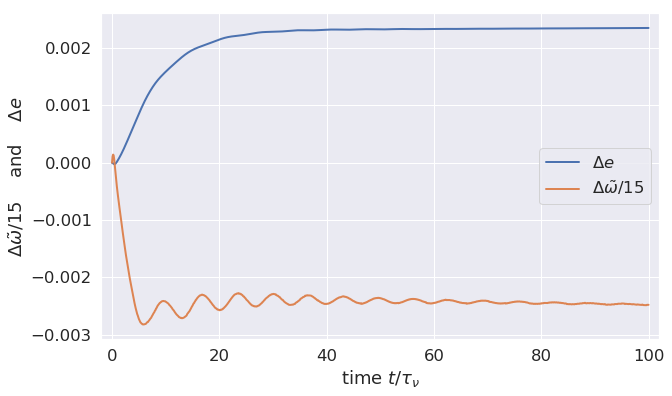

In [13]:
#plot de and dwt aversus time
x = times_viscous
y = de
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$\Delta e$')
y = dwt/15
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$\Delta\tilde{\omega}/15$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$\Delta\tilde{\omega}/15$    and    $\Delta e$')
p = ax.set_xlim(-2, 102)
p = ax.legend()

In [14]:
#compute e_prime, wt_prime, q to lowest order, and H(q)
H, q, e_prime, wt_prime = calculate_Hq(a_mean, e_mean, da, de, dwt)
H_avg = H.mean()

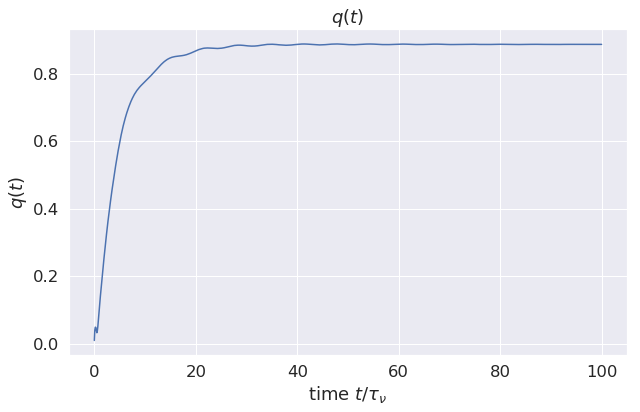

In [15]:
#plot q versus time
x = times_viscous
y = q
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(x, y, linestyle='-')
p = ax.set_title(r'$q(t)$')
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r'$q(t)$')

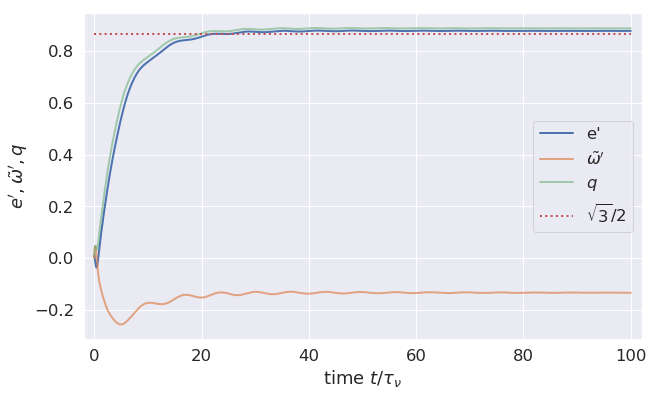

In [16]:
#plot e_prime wt_prime and q versus time
sns.set(font_scale=1.5, font='DejaVu Sans')
f, ax = plt.subplots(figsize=(10, 6))
x = times_viscous
y = e_prime
p = ax.plot(x, y, linestyle='-', linewidth=2, label="e'")
y = wt_prime
p = ax.plot(x, y, linestyle='-', linewidth=2, alpha=0.7, label=r"$\tilde{\omega}'$")
y = q
p = ax.plot(x, y, linestyle='-', linewidth=2, label=r'$q$', alpha=0.5)
p = ax.plot(x, x*0 + np.sqrt(3.0)/2.0, linestyle='dotted', linewidth=2, label=r"$\sqrt{3}/2$")
p = ax.set_xlabel(r'time $t/\tau_\nu$')
p = ax.set_ylabel(r"$e', \tilde{\omega}', q$")
p = ax.set_xlim(-2, 102)
p = ax.legend()